## About this dataset

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [3]:
pd.set_option('display.max_columns',500)

In [4]:
dataset

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


## Data Analysis

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


### from the info of dataset we can see there is no any missing values so we need not to adjust the values of variables

In [6]:
dataset.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


### features_details


Anemia = Decrease of red blood cells or hemoglobin (boolean)

creatinine_phosphokinase = Level of the CPK enzyme in the blood (mcg/L)

diabetes = the patient has diabetes (boolean)

ejection_fraction = Percentage of blood leaving the heart at each contraction (percentage)

high_blood_pressure = If the patient has hypertension (boolean)

platelets = Platelets in the blood (kiloplatelets/mL)

erum_creatinine = Level of serum creatinine in the blood (mg/dL)

serum_sodium = Level of serum sodium in the blood (mEq/L)

sex = Woman or man (binary)


### Now I am trying to get relationship from each feature to the Death event

In [7]:
reg_dataset=dataset.drop(columns='DEATH_EVENT')

In [8]:
reg_dataset

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [9]:
Death_event=dataset['DEATH_EVENT']

In [10]:
Catego_feature=[feature for feature in reg_dataset.columns if len(set(reg_dataset[feature]))<3]

In [11]:
Catego_feature

['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

In [12]:
Numerical_feature=[feature for feature in reg_dataset.columns if feature not in Catego_feature]

In [13]:
Numerical_feature

['age',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'time']

### Trying to find insights between Numerical Features and Death event

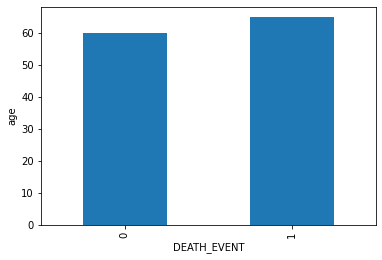

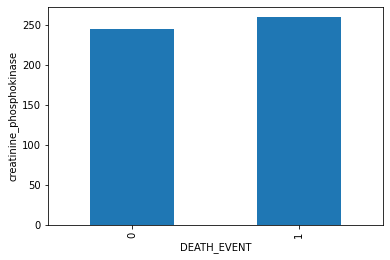

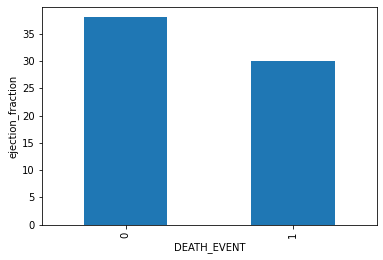

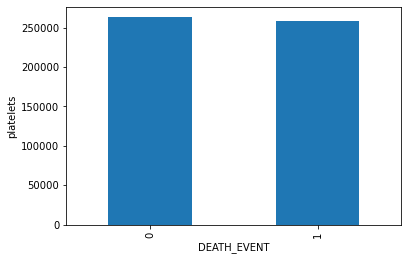

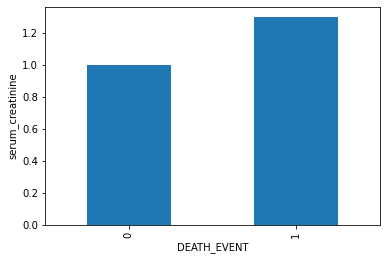

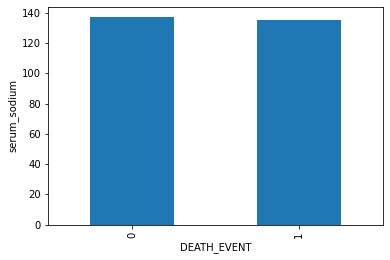

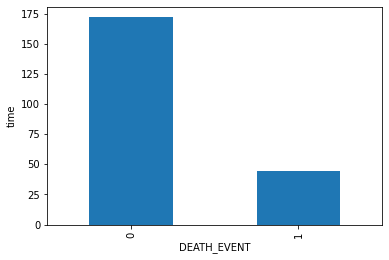

In [14]:
for feature in Numerical_feature:
    data=dataset.copy()
    data.groupby('DEATH_EVENT')[feature].median().plot.bar()
    plt.xlabel('DEATH_EVENT')
    plt.ylabel(feature)
    plt.show()
    

### Count of Death event in each categorical fetures

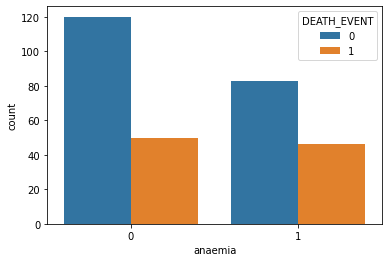

In [15]:
sns.countplot(x=dataset.anaemia,y=None,hue=dataset.DEATH_EVENT,data=reg_dataset)

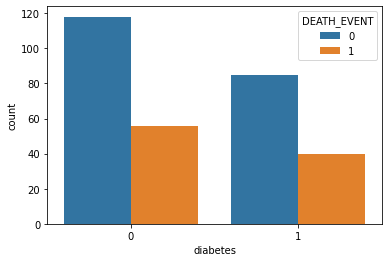

In [16]:
sns.countplot(x=dataset.diabetes,y=None,hue=dataset.DEATH_EVENT,data=reg_dataset) 


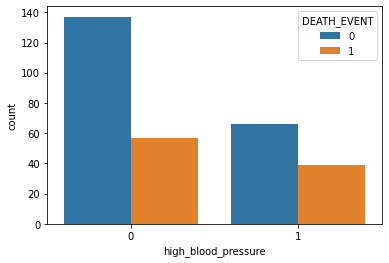

In [17]:
sns.countplot(x=dataset.high_blood_pressure,y=None,hue=dataset.DEATH_EVENT,data=reg_dataset)


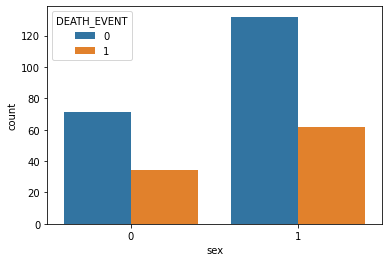

In [18]:
sns.countplot(x=dataset.sex,y=None,hue=dataset.DEATH_EVENT,data=reg_dataset)


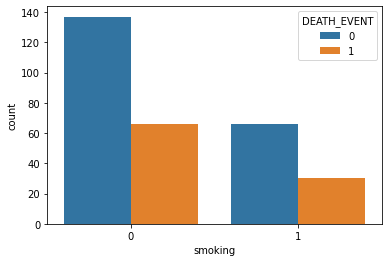

In [19]:
sns.countplot(x=dataset.smoking,y=None,hue=dataset.DEATH_EVENT,data=reg_dataset)

### Analayse the distribution of Continuous variable

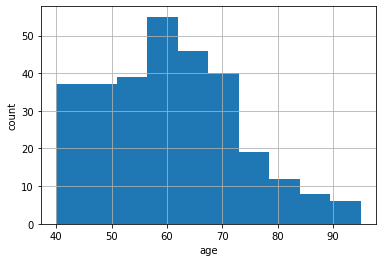

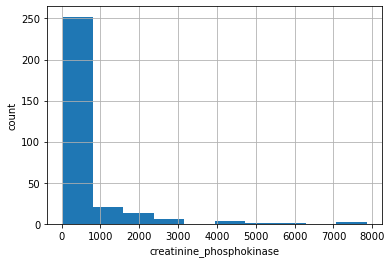

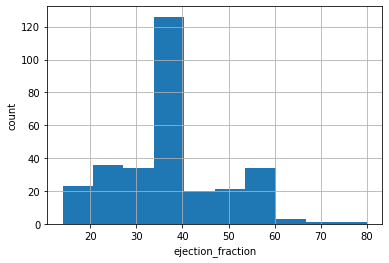

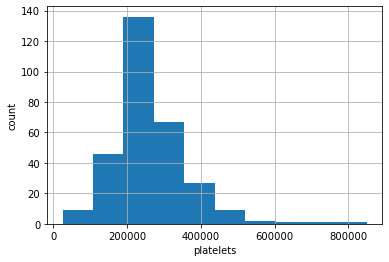

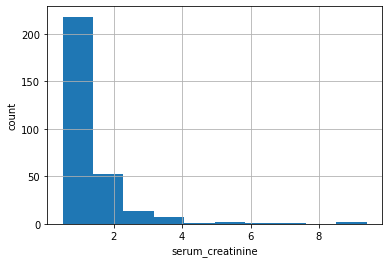

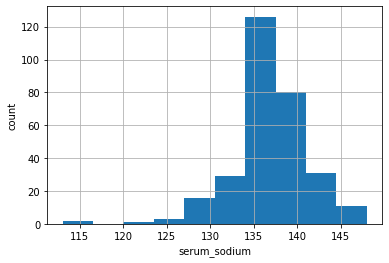

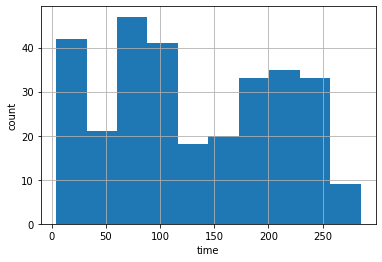

In [20]:
for feature in Numerical_feature:
    data=dataset.copy()
    data[feature].hist(bins=10)
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.show()

In [21]:
corr = dataset.corr()
corr

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


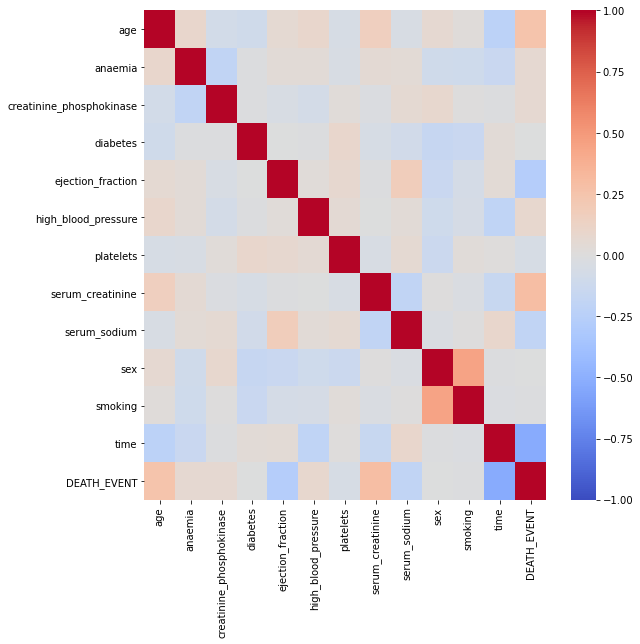

In [22]:
plt.figure(figsize=(9,9))
sns.heatmap(dataset.corr(),
            vmin = -1.0, vmax = 1.0,
            cmap='coolwarm',
            annot=False);

Inference: Only follow-up period is highly correlated to hearth failure relative to other features.
            patients having a long follow-up period have a lesser chance of death i.e they are negatively correlated.

# Finding outliers in time

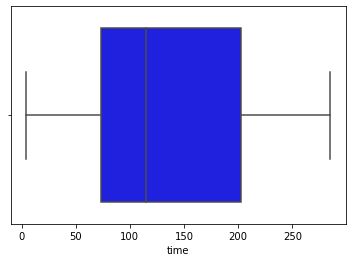

In [23]:
sns.boxplot(x=dataset.time, color = 'blue')
plt.show()

###  No outliers in time.

### Boxplot for ejection_fraction



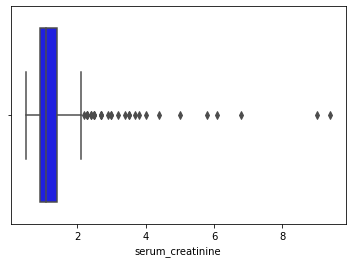

In [24]:
sns.boxplot(x=dataset.serum_creatinine, color = 'blue')
plt.show()

Before dealing with outliers we require knowledge about the outlier, the dataset and possibly some domain knowledge.
Removing outliers without a good reason will not always increase accuracy. Without a deep understanding of what are the possible ranges that
exist within each feature, removing outliers becomes tricky.

When I researched a bit I found that all the values in serum_creatinine falls in possible range of values. So they are not outliers. 
They are actual data points that helps in predicting DEATH_EVENT. 

# Train-Test split

In [25]:
x = dataset.iloc[:, :-1]
y = dataset['DEATH_EVENT']

categorical_columns = list(x.select_dtypes(include='category').columns)
numeric_columns = list(x.select_dtypes(exclude='category').columns)

In [52]:
x

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [59]:
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split


In [27]:
data_splits = train_test_split(x, y, test_size=0.25, random_state=5,
                               shuffle=True, stratify=y)
x_train, x_test, y_train, y_test = data_splits


In [54]:
x_train

array([[-0.30207664,  1.07417231, -0.45850982, ..., -1.31594351,
        -0.6882472 , -1.15070401],
       [ 0.78078728, -0.93094934,  1.92805979, ...,  0.75991104,
        -0.6882472 ,  1.53209088],
       [-1.30164333, -0.93094934, -0.03718635, ...,  0.75991104,
        -0.6882472 ,  0.65527499],
       ...,
       [-0.13548219,  1.07417231, -0.45850982, ...,  0.75991104,
         1.45296631, -0.11684647],
       [-1.30164333,  1.07417231,  0.33391314, ...,  0.75991104,
        -0.6882472 , -1.55639494],
       [ 1.53046229,  1.07417231, -0.52733529, ...,  0.75991104,
        -0.6882472 , -0.67957905]])

In [55]:
x_test

array([[-4.68671089e-01,  1.07417231e+00, -4.11076052e-01,
        -8.58157391e-01,  5.72796549e-01, -7.67236914e-01,
        -2.80719582e-03, -2.08465875e-01,  3.07707915e-02,
         7.59911040e-01,  1.45296631e+00,  1.06096592e+00],
       [-5.21849673e-02, -9.30949336e-01, -5.15244328e-01,
        -8.58157391e-01, -1.57567008e+00, -7.67236914e-01,
        -1.46955923e+00,  1.29083845e+00, -2.43089253e+00,
         7.59911040e-01,  1.45296631e+00, -8.62794313e-01],
       [-1.21834611e+00, -9.30949336e-01, -4.22236939e-01,
         1.16528741e+00, -1.83348607e+00,  1.30337837e+00,
         7.48391606e-02,  5.93487599e-01, -3.16939152e+00,
        -1.31594351e+00, -6.88247202e-01, -3.91669358e-01],
       [-4.68671089e-01, -9.30949336e-01, -5.17104476e-01,
        -8.58157391e-01,  1.43103223e-01, -7.67236914e-01,
        -6.16075909e-01, -3.65369816e-01,  2.76937123e-01,
         7.59911040e-01, -6.88247202e-01,  1.34887562e+00],
       [-1.30164333e+00, -9.30949336e-01, -3.7186347

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline 

# Preprocessing Pipeline: Standardization
    
We need to standardize the continuous or quantitative variables/ features before applying Machine Learning models.

In [29]:

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])


## Column Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ],
    remainder='passthrough')


## Applying Column Transformer
x_train = preprocessor.fit_transform(x_train)
x_test = preprocessor.transform(x_test)


In [30]:
# Applying logistic regression on the training set

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [31]:
# Predicting the test set

y_pred = classifier.predict(x_test)

In [56]:
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1], dtype=int64)

In [32]:
# Making Confusion Matrix and calculating accuracy score

mylist = []
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

[[45  6]
 [10 14]]
0.7866666666666666


In [33]:
from sklearn.metrics import f1_score, precision_score, recall_score

In [34]:
  print(f1_score(y_test, y_pred, average="macro"))
   

0.7427101200686106


In [35]:
 print(precision_score(y_test, y_pred, average="macro"))
   

0.759090909090909


In [36]:
 print(recall_score(y_test, y_pred, average="macro"))  

0.732843137254902


In [37]:
mylist

[0.7866666666666666]

In [38]:
ac

0.7866666666666666

In [39]:
Death_event.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [41]:
from xgboost import XGBClassifier

In [42]:
model = XGBClassifier()

In [44]:
model.fit(x_train,y_train)


[12:02:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [45]:
# predict the target on the train dataset
predict_train = model.predict(x_train)
print('\nTarget on train data',predict_train) 

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)


Target on train data [1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 1 0
 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1
 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0
 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 1 0 0
 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0
 1 0]

accuracy_score on train dataset :  1.0


In [46]:
# predict the target on the test dataset
predict_test = model.predict(x_test)
print('\nTarget on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('\naccuracy_score on test dataset : ', accuracy_test)


Target on test data [0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0
 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0
 1]

accuracy_score on test dataset :  0.8133333333333334
